In [1]:
#Importando as bibliotecas necessárias para a visualização# 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime

In [2]:
# lendo os dados##
rubloxdolar = pd.read_csv(r'C:\Users\ahcar\Documents\conteudo\analise ucrania\dados\USD_RUB Dados Históricos.csv')
rubloxdolar.rename(columns={'Último': 'Price', 'Data': 'Date','Máxima': 'High','Mínima': 'Low', 'Var%': 'Change%', 'Abertura': 'Open',}, inplace=True)

In [3]:
rubloxdolar

,Date,Price,Open,High,Low,Change%
0,Jul 22,"55,0200","51,4500","64,5988","51,3998","6,94%"
1,Jun 22,"51,4500","61,5000","62,4923","50,1006","-16,34%"
2,Mai 22,"61,5000","70,9600","70,9600","55,8383","-13,33%"
3,Abr 22,"70,9600","83,2000","84,9917","70,3221","-14,71%"
4,Mar 22,"83,2000","94,6025","121,2100","82,9525","-12,05%"
...,...,...,...,...,...,...
86,Mai 15,"52,3212","51,6513","52,1965","50,3630","1,30%"
87,Abr 15,"51,6513","58,1993","58,4863","49,4550","-11,25%"
88,Mar 15,"58,1993","61,6207","63,0344","56,2019","-5,55%"
89,Fev 15,"61,6207","68,8629","70,4525","59,8819","-10,52%"


In [4]:
rubloxdolar = rubloxdolar[['Date', 'Price']]

In [5]:
rubloxdolar = rubloxdolar.dropna()

In [6]:
rubloxdolar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    91 non-null     object
 1   Price   91 non-null     object
dtypes: object(2)
memory usage: 2.1+ KB


In [7]:
reversed_df = rubloxdolar.iloc[::-1]

In [8]:
reversed_df

,Date,Price
90,Jan 15,"68,8629"
89,Fev 15,"61,6207"
88,Mar 15,"58,1993"
87,Abr 15,"51,6513"
86,Mai 15,"52,3212"
...,...,...
4,Mar 22,"83,2000"
3,Abr 22,"70,9600"
2,Mai 22,"61,5000"
1,Jun 22,"51,4500"


In [9]:
## transformando a variavel ''Date'' em datetime (explicar o que é datetime) #
inicio_date = datetime.date(2015, 1, 1)
fim_date = datetime.date(2022, 7, 1)
delta = relativedelta(months=1)
datas = []
while (inicio_date <= fim_date):
    datas.append(inicio_date)
    inicio_date += delta
for registro in range(len(reversed_df)):
    reversed_df.loc[registro, 'datetime'] = datas[registro]



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [10]:
# colocando a Data como índice
rublo3 = reversed_df.set_index('datetime')


In [11]:
rublo3 = reversed_df.drop(columns=['Date'])

In [12]:
reversed_df

,Date,Price,datetime
90,Jan 15,"68,8629",2022-07-01
89,Fev 15,"61,6207",2022-06-01
88,Mar 15,"58,1993",2022-05-01
87,Abr 15,"51,6513",2022-04-01
86,Mai 15,"52,3212",2022-03-01
...,...,...,...
4,Mar 22,"83,2000",2015-05-01
3,Abr 22,"70,9600",2015-04-01
2,Mai 22,"61,5000",2015-03-01
1,Jun 22,"51,4500",2015-02-01


In [13]:
rublo3.set_index('datetime', inplace=True)

In [14]:
rublo3['Price'] = rublo3['Price'].str.replace(',','.').astype(float)

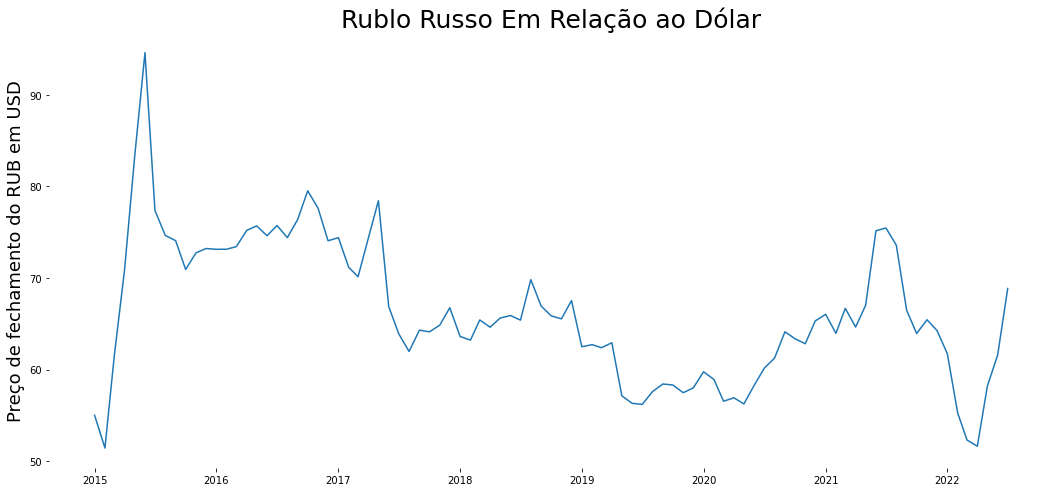

In [15]:
plt.figure(figsize=(18, 8)) 
  
plt.plot(rublo3) 


plt.title('Rublo Russo Em Relação ao Dólar', fontsize=25)
plt.ylabel('Preço de fechamento do RUB em USD', fontsize=18)



for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
plt.show()